# ML Foundations hw2 - Coursera

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

## 6.

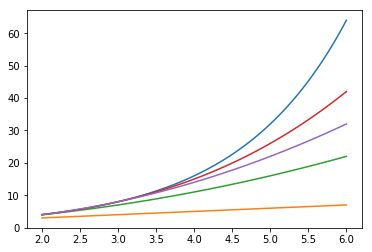

In [2]:
x = np.linspace(2, 6, 100)
y = np.power(2, x)
a = x + 1
b = x * x / 2 + x / 2+ 1
c = x * x * x / 6 + 5 / 6 * x + 1
d = x * x - x + 2
plt.plot(x, y, x, a, x, b, x, c, x, d)
plt.show()

## 11.

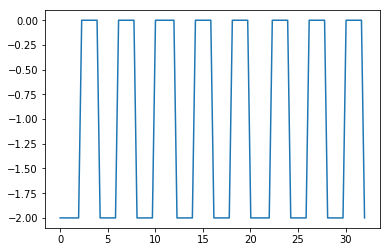

In [3]:
alpha = 1
x = np.linspace(0, 32, 100)
h = np.sign(np.mod(alpha*x, 4)-2) - 1
plt.plot(x, h)
plt.show()

## 13.

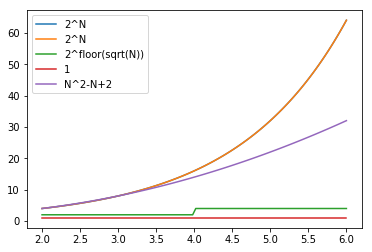

In [4]:
n = np.linspace(2, 6, 100)
y = np.power(2, n)
a = np.power(2, n)
b = np.power(2, np.floor(np.sqrt(n)))
c = np.ones(n.shape)
d = n * n - n + 2
plt.plot(n, y, label='2^N')
plt.plot(n, a, label='2^N')
plt.plot(n, b, label='2^floor(sqrt(N))')
plt.plot(n, c, label='1')
plt.plot(n, d, label='N^2-N+2')
plt.legend()
plt.show()

## 16.

In [5]:
def gen_data(data_size):
    X = np.random.uniform(low=-1, high=1, size=data_size)
    Y = np.sign(X)
    # Add noise with 20% probability
    noise = np.random.uniform(size=data_size)
    noise = [-1 if i else 1 for i in (noise > 0.8)]
    Y = Y * noise
    # Sort by x value
    sort_index = X.argsort()
    X = X[sort_index]
    Y = Y[sort_index]
    return X, Y

def h(x, theta, s):
    return s * np.sign(x-theta)

def E_out(theta, s):
    return 0.5 + 0.3 * s * (np.abs(theta)-1)

def E_in(X, Y, theta, s):
    err_cnt = 0
    for i in range(len(X)):
        if h(X[i], theta, s) != Y[i]:
            err_cnt += 1
    return err_cnt / len(X)

def decision_stump(X, Y):
    min_E_in = np.inf
    best_theta, best_s = 0, 0
    for i in range(len(X)-1):
        for s in [-1, 1]:
            theta = np.median(X[i:i+2])
            err = E_in(X, Y, theta, s)
            if err < min_E_in:
                best_theta, best_s = theta, s
                min_E_in = err

    # All +1
    theta, s = np.median([-1, X[0]]), 1
    err = E_in(X, Y, theta, s)
    if err < min_E_in:
        best_theta, best_s = theta, s
        min_E_in = err
    # All -1
    theta, s = np.median([X[-1], 1]), 1
    err = E_in(X, Y, theta, s)
    if err < min_E_in:
        best_theta, best_s = theta, s
        min_E_in = err

    return best_theta, best_s, min_E_in

## 17. 18.

In [6]:
data_size = 20
iter_time = 5000

total_E_in = 0
total_E_out = 0

for i in tqdm(range(iter_time)):
    X, Y = gen_data(data_size)
    theta, s, min_E_in = decision_stump(X, Y)
    
    total_E_in += min_E_in
    total_E_out += E_out(theta, s)
    
print('Average E_in:', total_E_in/iter_time)
print('Average E_out:', total_E_out/iter_time)

100%|██████████| 5000/5000 [00:21<00:00, 227.57it/s]

Average E_in: 0.1687600000000003
Average E_out: 0.257335740951348


## 19.

In [7]:
train = np.loadtxt('hw2_train.dat')
test = np.loadtxt('hw2_test.dat')

In [8]:
X_train = train[:, :-1]
Y_train = train[:, -1]
X_test = test[:, :-1]
Y_test = test[:, -1]

In [9]:
best_theta, best_s = 0, 0
best_E_in = np.inf
best_dim = np.inf

# Run decision stump on each dimension
for i in range(X_train.shape[1]):
    X = X_train[:, i]
    Y = Y_train
    # Sort by x value
    sort_index = X.argsort()
    X = X[sort_index]
    Y = Y[sort_index]
    theta, s, min_E_in = decision_stump(X, Y)
    if min_E_in < best_E_in:
        best_theta, best_s = theta, s
        best_E_in = min_E_in
        best_dim = i
        
print('E_in:', best_E_in)
print('Selected dimension:', best_dim)

E_in: 0.25
Selected dimension: 3


## 20.

In [10]:
test_E_out = E_in(X_test[:, best_dim], Y_test, best_theta, best_s)
print('E_out:', test_E_out)

E_out: 0.355


# ML Foundations hw2 - extension

## 7.

In [11]:
data_size = 20
iter_time = 1000
history = []

for i in tqdm(range(iter_time)):
    X, Y = gen_data(data_size)
    theta, s, min_E_in = decision_stump(X, Y)
    diff = min_E_in - E_out(theta, s)
    history.append(diff)

100%|██████████| 1000/1000 [00:03<00:00, 303.51it/s]


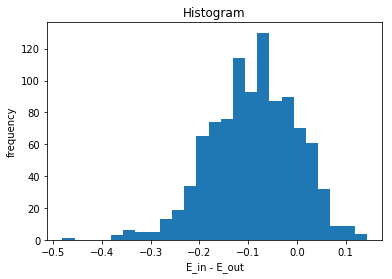

In [13]:
plt.hist(history, bins='auto')
plt.title('Histogram')
plt.xlabel('E_in - E_out')
plt.ylabel('frequency')
plt.show()

In [ ]:
print('Mean of ')